Loading libraries

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="white")
from sklearn.metrics import mean_squared_error

# Defining some functions

In [2]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [3]:
# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

In [4]:
def plot_boundary(probs):
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                          vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X[:,0], X[:, 1], c=y[:], s=30,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

    ax.set(aspect="equal",
           xlim=(-5, 5), ylim=(-5, 5),
           xlabel="$X_1$", ylabel="$X_2$")
    plt.show()

Getting some random data to classity

In [5]:
N = 200
D = 2
N2 = int(N/2)
X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:N2,:] = X[:N2,:] - 2*np.ones((N2,D))

# center the last 50 points at (2, 2)
X[N2:,:] = X[N2:,:] + 2*np.ones((N2,D))

# labels: first 50 are 0, last 50 are 1
y = np.array([0]*N2 + [1]*N2)

In [6]:
# X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)

checking shapes, number of samples and features

In [7]:
N = X.shape[0]
D = X.shape[1]
print(N, D, N2)

200 2 100


Text(0,0.5,'x2')

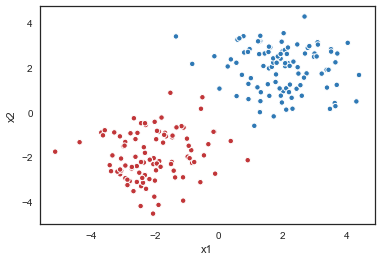

In [9]:
plt.scatter(X[:,0], X[:, 1], c=y[:], s=30,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)
plt.xlabel('x1')
plt.ylabel('x2')

## Adding bias

In [10]:
# add a column of ones
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X[:]), axis=1)

view of data

In [11]:
Xb[:10]

array([[ 1.        , -0.55702128,  0.15168086],
       [ 1.        , -2.75961626, -0.94219401],
       [ 1.        , -2.33178072, -2.79455658],
       [ 1.        , -2.2859929 , -0.5757089 ],
       [ 1.        , -1.45392507, -1.12205573],
       [ 1.        , -0.83468645, -2.26710848],
       [ 1.        , -3.05599974, -2.08451329],
       [ 1.        , -1.10087407, -0.68649659],
       [ 1.        , -2.56169449, -2.40726433],
       [ 1.        , -1.78949537, -0.24042406]])

Preparing the plot of decision boundary. Background image.

In [12]:
xx, yy = np.mgrid[-5:5:.1, -5:5:.1]
print(xx.shape)
ones = np.ones((len(xx.ravel())))
grid_b = np.c_[ones.ravel(), xx.ravel(), yy.ravel()]

(100, 100)


In [13]:
def decision_boundary(pesos):
    z = grid_b.dot(pesos)
    probs = sigmoid(z).reshape(xx.shape)
    plot_boundary(probs)
    
    z = Xb.dot(pesos)
    H = sigmoid(z)
    losses = -np.log(H)
    loss = cross_entropy(y, H)

    plt.plot(H, losses, marker='.', linestyle='none')
    plt.ylabel('loss')
    plt.xlabel('hypothesis h(x)')

    print('loss: ', loss)

# Excersice!

Modify the values of the pesos' array and see what happened with the decision boundary. Could you wonder out any strategy to guess the right boundary?

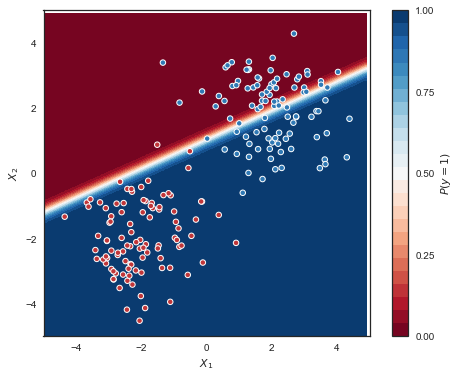

loss:  inf


/home/p.perez/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log


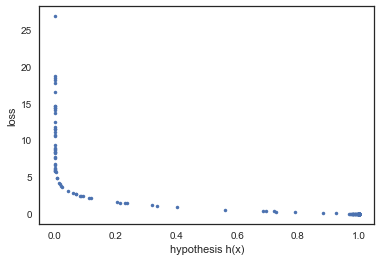

In [17]:
peso_bias = 9
peso_x1 = 4
peso_x2 = -9

decision_boundary([peso_bias, peso_x1, peso_x2])